# General Assembly London (DAT-11)
## Unit Project 1

- **Assigned:** Mon 17th October 2016
- **Due:** Sun 30th October 2016, 11:59pm
- **Submission URL:** [https://app.schoology.com/assignment/843545951/info](https://app.schoology.com/assignment/843545951/info)

#### _"A problem well-stated is half-solved" -- Charles Kettering_

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

You will then implement your exploratory analysis plan. This will lay the groundwork for our our first modelling exercise in Project 2.

## Suggestions for getting started
1. Many of the answers in Unit Project 1 should be pretty short, a lot may be just a couple words, most should be only a sentence or two maximum. If you're writing multiple paragraphs, you're probably overthinking it!
2. IPython Notebooks have some handy keyboard shortcuts (under Help above).
3. Try out basic Markdown for commonly used formats; look up commands for headers, bold, italic, tables.
4. Try out a few pandas commands for describing your data:
  - `df['dataframeName'].describe()`
  - `df['columnName'].sum()`
  - `df['columnName'].mean()`
  - `df['columnName'].count()`
  - `df['columnName'].skew()`
  - `df.corr()`
5. Read the docs for Pandas. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success as a data scientist.
6. Additional links:
  - [IPython Notebook Shortcuts](https://ipython.org/ipython-doc/1/interactive/notebook.html#keyboard-shortcuts)
  - [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
  - [IPython Notebook Docs](http://ipython.readthedocs.org/en/stable/)
  - [Pandas Docs](http://pandas.pydata.org/pandas-docs/stable/)
  - [Useful Pandas Snippets](https://gist.github.com/bsweger/e5817488d161f37dcbd2)

## Part 1: Interpreting a problem statement
We will not perform the analysis on this problem statement (if you're able to obtain the data, you're welcome to do this in your own time!); this exercise is purely about interpreting the statement below.

### Read and evaluate the following problem statement: 
Determine how likely US citizens are to vote for Donald Trump, using demographic data from the US census (age, gender, location, and profession) and previous voting data (registered = 1, unregistered = 0, voting history from 2012 election) based on data from the 2010 US census and the 2012 US presidential election.

#### 1. What is the outcome variable?

Answer: Likelyhood to vote for Donald Trump

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, previous voting data (from 2010 US census and 2012 US presidential election respectively)

#### 3. What timeframe is this data relevant for?
> Tip: This is more about being explicit with your assumptions, I'm looking for a very short answer here. For example, if it was 1900 census data, would that be useful for this exercise?

Answer: Source data is from 2010 (census) and 2012 (election data). Assumptions are that the predictor variables at that time will still be good predictors in 2016 (e.g. no major shifts in demographic relationship with parties)

#### 4. Suggest a hypothesis that would be testable using this dataset:

Answer: Males are more likely to vote for Donald Trump

## Part 2: University admissions dataset
We would like to explore the association between admission into grad school and the prestige of undergraduate institutions.

In [1]:
# Here are some the usual imports plus the dataset we'll be working with
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

%matplotlib inline
sns.set_style("darkgrid")

df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [2]:
# Check for nulls
print df['prestige'].isnull().sum()
print df['gre'].isnull().sum()
print df['gpa'].isnull().sum()

1
2
2


In [3]:
# Which rows have missing GPA?
df[df['gpa'].isnull()].index.tolist()

[187, 236]

In [4]:
# GPA and GRE are missing at row 187. We'll check this later when backfilling/imputing.
df[180:200]

,admit,gre,gpa,prestige
180,0,620.0,3.78,3.0
181,0,500.0,3.88,4.0
182,0,700.0,4.00,2.0
183,1,540.0,3.84,2.0
184,0,500.0,2.79,4.0
185,0,800.0,3.60,2.0
186,0,560.0,3.61,3.0
187,0,NaN,NaN,2.0
188,0,560.0,3.07,2.0
189,0,500.0,3.35,2.0


#### 1. Create a data dictionary for this dataset

| Variable | Description | Type of Variable |
| --| --| -- |
|admit | Admission status 1 = was admitted, 0 = was not admitted | categorical |
| gre | GRE test score | continuous |
| gpa | Grade Point Average | continuous |
| prestige | University prestige score. 1 is highest, 4 is lowest | categorical |



#### 2. What is the outcome variable?

Answer: Admission to grad school ('admit')

#### 3. What are the predictors/covariates? 

Answer: GRE, GPA, Prestige

#### 4. What timeframe is this data relevant for?

Answer: Unknown

#### 5. Suggest a hypothesis that would be testable using this dataset:

Answer: The higher the prestige of the undergrad school, the higher the likelyhood of admission to grad school

#### 6. Using the above information, write a well-formed problem statement.

> ### Problem Statement
> The prestige of a student's undergraduate school is associated with their likelihood of acceptance into grad school

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To discover if there is a relationship between the observed prestige of a student's undergrad school with the observed acceptance rate into graduate school

#### 2a. What are your assumptions about this data? Are there any assumptions of the distribution of data? 

Answer: It is assumed that:

* The dataset is not inherently skewed (e.g. that there is a larger proportion of acceptees represented in this set than in the whole population for a particular school)
* The pretige classification for each school is 'correct'
* The data is normally distributed

#### 2b. What's one way to determine the distribution of your data? 

Answer: Run a histogram/distribution plot on the data. For normal data (as assumed), the data should look like a normal 'bell curve' and there should not be major outliers.

#### 3a. How might outliers impact your analysis? 

Answer: Outliers can significantly impact summary data (mean, max, etc) as well as analysis such as linear regression (by skewing the gradient of the output).

#### 3b. What's one way to test for outliers? 

Answer: A boxplot or histogram

#### 4a. What is collinearity? 

Answer: When two independent variables are strongly correlated

#### 4b. How will you test for collinearity? 

Answer: Use Pandas' .corr() to create a heatmap of the independent variables for correlation

#### 5. What is your exploratory analysis plan?
Using the above information, write an brief outline of your exploratory analysis plan, that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
1. Determine the hypothesis and goals that we would like to achieve with the data
2. Acquire datasets
3. Explore and clean the data (remove nulls, format dates, etc)
4. Create a data dictionary (if not already existing)
5. Check the distribution of the data and normalise it if required (e.g. log transform etc)
6. Check for collinearity
7. Determine an appropriate model and run analysis
8. Document and represent findings
9. Repeat steps as required

## Part 3. Exploratory analysis

#### Question 1. How many observations are in our dataset? 

In [5]:
print "There are " + str(len(df)) + " observations in our dataset"

There are 400 observations in our dataset


#### Question 2. For all variables, display every summary statistic we've discussed in class

In [6]:
# We get some NaNs because of the missing values
df.describe()

/Users/rhyscater/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger possible spread of values (220-800) than GPA (2.26-4)

#### Question 4. Drop data points with missing data

In [7]:
newdf = df.dropna().copy()
newdf[180:200]

,admit,gre,gpa,prestige
180,0,620.0,3.78,3.0
181,0,500.0,3.88,4.0
182,0,700.0,4.00,2.0
183,1,540.0,3.84,2.0
184,0,500.0,2.79,4.0
185,0,800.0,3.60,2.0
186,0,560.0,3.61,3.0
188,0,560.0,3.07,2.0
189,0,500.0,3.35,2.0
190,1,640.0,2.94,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Count the number of null rows, as below (=0). Also check the total number of rows to verify that the expected number were removed. We are missing three rows as expected. Summary shows no NaN errors.

We can also manually make some checks, as in the segment of rows 180-200 above (we noted at the beginning that row 187 was missing values).

In [8]:
print newdf['prestige'].isnull().sum()
print newdf['gre'].isnull().sum()
print newdf['gpa'].isnull().sum()
print len(newdf)
print newdf.describe()

0
0
0
397
            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1195dc810>],
 'caps': [<matplotlib.lines.Line2D at 0x1195f3650>,
 'fliers': [<matplotlib.lines.Line2D at 0x1195fe950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1195fe310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1195dca10>,
  <matplotlib.lines.Line2D at 0x1195dc4d0>]}

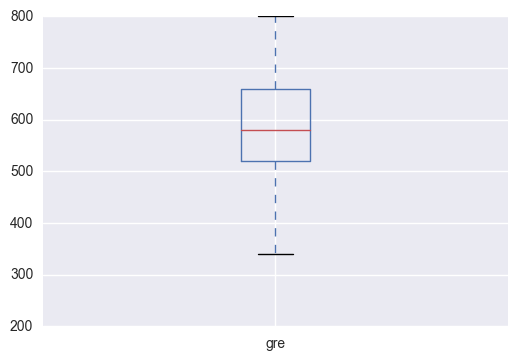

In [9]:
# boxplot 1
newdf.boxplot(column='gre', return_type='dict')

{'boxes': [<matplotlib.lines.Line2D at 0x119c19390>],
 'caps': [<matplotlib.lines.Line2D at 0x119c241d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x119c2e4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119c24e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119c19590>,
  <matplotlib.lines.Line2D at 0x119c19c50>]}

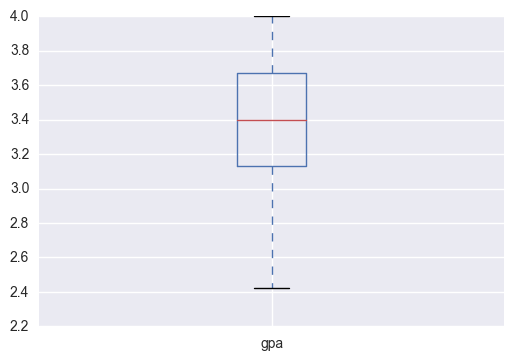

In [10]:
# boxplot 2
newdf.boxplot(column='gpa', return_type='dict')

#### Question 7. What do these kind of plots show?

Answer: 
* Max
* Min
* Interquartile range
* Mean

#### Question 8. Describe the distribution of each variable using an appropriate visualisation

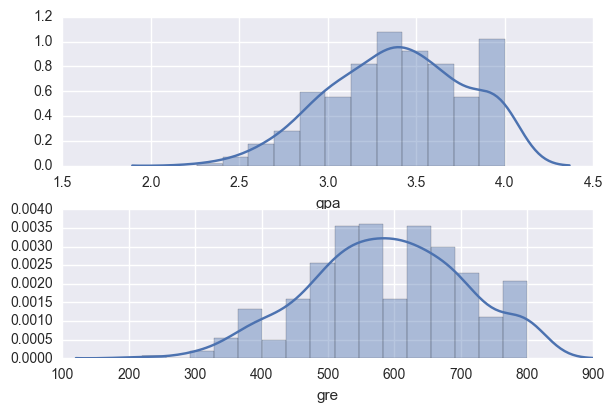

In [22]:
# plot the distribution of each variable 

fig, (ax1, ax2) = plt.subplots(2,1)
fig.tight_layout(w_pad=3)
sns.distplot(newdf['gpa'], ax=ax1)
sns.distplot(newdf['gre'], ax=ax2)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. Both are negatively skewed (GPA moreso than GRE). Shapiro and a qq plot seem to corroborate (below).

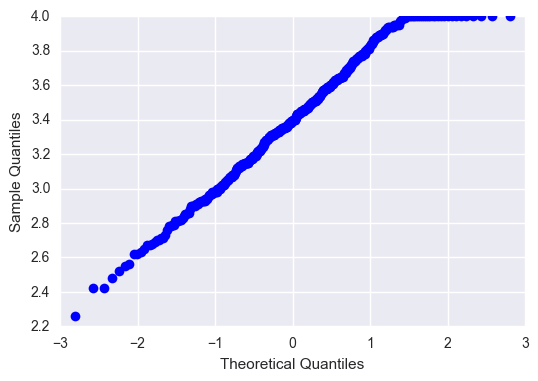

In [12]:
# This qq plot looks OK until the notable plateau
import statsmodels.api as sm

sm.qqplot(newdf['gpa'])
plt.show()

In [13]:
stats.shapiro(newdf['gre'])
# Output with p (second value) < 0.05 rejects the null hypothesis of normality

(0.9857397079467773, 0.0006041502929292619)

In [14]:
print newdf.skew()
print newdf.kurt()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64
admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. We should transform it to make it more normal. The reason we do this is because many machine learning algorithms assume normal distributions. We could try to achieve this via log transform, exponential transform, or sklearn preprocessing

#### Question 11. Which of our variables are potentially collinear?

               gre       gpa  prestige
gre       1.000000  0.382408 -0.124533
gpa       0.382408  1.000000 -0.059031
prestige -0.124533 -0.059031  1.000000
Axes(0.125,0.125;0.62x0.775)


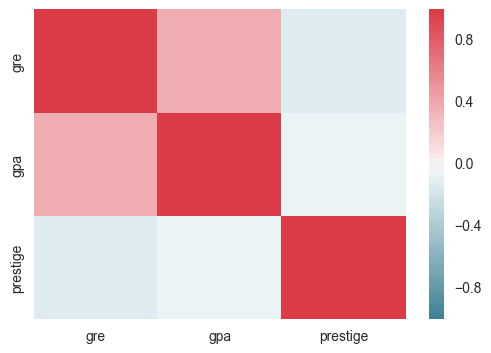

In [15]:
# create a correlation matrix for the data
colour_map = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['gre', 'gpa', 'prestige']].corr()
print correlations
print sns.heatmap(correlations, cmap=colour_map)

#### Question 12. What did you find?

Answer: GPA and GRE are relatively well correlated - this could cause issues of colinearity so we should be careful if including both variables in analysis.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data


In [16]:
# Row 187 had missing data

# Fill NaN with 0
df_0 = df.fillna(0)
print df_0[180:200]

# Fill NaN with value from next row (probably not a good approach with this particular set!)
df_backfill = df.fillna(method='backfill')
print df_backfill[180:200]

     admit    gre   gpa  prestige
180      0  620.0  3.78       3.0
181      0  500.0  3.88       4.0
182      0  700.0  4.00       2.0
183      1  540.0  3.84       2.0
184      0  500.0  2.79       4.0
185      0  800.0  3.60       2.0
186      0  560.0  3.61       3.0
187      0    0.0  0.00       2.0
188      0  560.0  3.07       2.0
189      0  500.0  3.35       2.0
190      1  640.0  2.94       2.0
191      0  800.0  3.54       3.0
192      0  640.0  3.76       3.0
193      0  380.0  3.59       4.0
194      1  600.0  3.47       2.0
195      0  560.0  3.59       2.0
196      0  660.0  3.07       3.0
197      1  400.0  3.23       4.0
198      0  600.0  3.63       3.0
199      0  580.0  3.77       4.0
     admit    gre   gpa  prestige
180      0  620.0  3.78       3.0
181      0  500.0  3.88       4.0
182      0  700.0  4.00       2.0
183      1  540.0  3.84       2.0
184      0  500.0  2.79       4.0
185      0  800.0  3.60       2.0
186      0  560.0  3.61       3.0
187      0  56

#### 2. Bonus: Log transform the skewed data


In [17]:
log_columns = ['gre', 'gpa']
log_df = newdf.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log1p)
log_df.head()


,admit,gre,gpa,prestige
0,0,5.942799,1.528228,3.0
1,1,6.493754,1.541159,3.0
2,1,6.685861,1.609438,1.0
3,1,6.463029,1.432701,4.0
4,0,6.255750,1.368639,4.0


#### 3. Advanced: Impute missing data

In [18]:
df_impute = df.copy()
df_impute.fillna(df.median(), inplace=True)
df_impute[180:200]

,admit,gre,gpa,prestige
180,0,620.0,3.780,3.0
181,0,500.0,3.880,4.0
182,0,700.0,4.000,2.0
183,1,540.0,3.840,2.0
184,0,500.0,2.790,4.0
185,0,800.0,3.600,2.0
186,0,560.0,3.610,3.0
187,0,580.0,3.395,2.0
188,0,560.0,3.070,2.0
189,0,500.0,3.350,2.0
